In [2]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from pandas import datetime
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")


C:\Users\MANISH\AppData\Local\Temp\ipykernel_9040\3573006948.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
#importing data
df=pd.read_csv("Lung_Cancer.csv")

#Printing shape(rows,columns)
print("Shape : ",df.shape)


Shape :  (2150, 34)


In [4]:
#Columns and their significance
feature_full_forms = ['Patient ID', 'Lung Cancer Topography', 'Source of Topography Information', 'Diagnostic Examination Type', 'Diagnostic Examination Grade', 'Diagnostic Examination Staging', 'Pathological Staging', 'Clinical Staging', 'Summary Staging', 'Validation Clinical Staging Group', 'Clinical T Stage (7th Edition)', 'Clinical N Stage (7th Edition)', 'Clinical M Stage (7th Edition)', 'Pathological T Stage (7th Edition)', 'Pathological N Stage (7th Edition)', 'Pathological M Stage (7th Edition)', 'Diagnostic Examination Staging (7th Edition)', 'First Lung Cancer Diagnosis', 'Lesion Size', 'Lung Cancer Morphology', 'Lung Cancer Behavior', 'Lung Cancer Grade', 'Source of Best Stage Information', 'Clinical T Stage', 'Pathological T Stage', 'Clinical N Stage', 'Pathological N Stage', 'Clinical M Stage', 'Pathological M Stage', 'Stage Information Only', 'Year of the Study', 'Dataset Version', 'Order of the Lung Cancer', 'Days from randomization to diagnosis of lung cancer']
df_columns=list(df.columns)

for i in df_columns:
    print(i,":",feature_full_forms[df_columns.index(i)])

pid : Patient ID
lc_topog : Lung Cancer Topography
topog_source : Source of Topography Information
de_type : Diagnostic Examination Type
de_grade : Diagnostic Examination Grade
de_stag : Diagnostic Examination Staging
path_stag : Pathological Staging
clinical_stag : Clinical Staging
stage_sum : Summary Staging
valcsg : Validation Clinical Staging Group
clinical_t_7thed : Clinical T Stage (7th Edition)
clinical_n_7thed : Clinical N Stage (7th Edition)
clinical_m_7thed : Clinical M Stage (7th Edition)
path_t_7thed : Pathological T Stage (7th Edition)
path_n_7thed : Pathological N Stage (7th Edition)
path_m_7thed : Pathological M Stage (7th Edition)
de_stag_7thed : Diagnostic Examination Staging (7th Edition)
first_lc : First Lung Cancer Diagnosis
lesionsize : Lesion Size
lc_morph : Lung Cancer Morphology
lc_behav : Lung Cancer Behavior
lc_grade : Lung Cancer Grade
source_best_stage : Source of Best Stage Information
clinical_t : Clinical T Stage
path_t : Pathological T Stage
clinical_n :

In [5]:
#First 10 rows of data
df.head(10)

,pid,lc_topog,topog_source,de_type,de_grade,de_stag,path_stag,clinical_stag,stage_sum,valcsg,...,path_t,clinical_n,path_n,clinical_m,path_m,stage_only,study_yr,dataset_version,lc_order,candx_days
0,100012,C34.1,2.0,8140.0,3,110.0,110.0,110.0,NaN,NaN,...,100.0,0.0,0.0,0.0,0.0,NaN,1,2011.02.03/05.12.21,1,454
1,100049,C34.3,1.0,8046.0,4,220.0,NaN,220.0,1.0,NaN,...,NaN,0.0,NaN,0.0,NaN,220.0,6,2011.02.03/05.12.21,1,2428
2,100055,C34.3,NaN,8140.0,1,400.0,NaN,400.0,3.0,NaN,...,NaN,200.0,NaN,100.0,NaN,400.0,0,2011.02.03/05.12.21,1,148
3,100147,C34.1,2.0,8140.0,3,110.0,110.0,110.0,1.0,NaN,...,100.0,0.0,0.0,0.0,0.0,110.0,1,2011.02.03/05.12.21,1,491
4,100158,C34.1,2.0,8140.0,4,110.0,110.0,110.0,NaN,NaN,...,100.0,0.0,0.0,0.0,0.0,NaN,2,2011.02.03/05.12.21,1,795
5,100196,C34.3,1.0,8140.0,1,400.0,NaN,400.0,3.0,NaN,...,NaN,200.0,NaN,100.0,NaN,400.0,5,2011.02.03/05.12.21,1,2115
6,100242,C34.1,2.0,8250.0,3,110.0,999.0,110.0,1.0,3.0,...,100.0,0.0,999.0,0.0,0.0,110.0,0,2011.02.03/05.12.21,1,79
7,100242,C34.1,2.0,8140.0,4,110.0,999.0,110.0,1.0,3.0,...,100.0,0.0,999.0,0.0,0.0,110.0,0,2011.02.03/05.12.21,2,79
8,100264,C34.0,2.0,8046.0,5,400.0,NaN,400.0,3.0,NaN,...,NaN,200.0,NaN,100.0,NaN,400.0,1,2011.02.03/05.12.21,1,524
9,100280,C34.3,NaN,8140.0,2,110.0,110.0,110.0,NaN,NaN,...,100.0,0.0,0.0,0.0,0.0,NaN,1,2011.02.03/05.12.21,1,456


In [6]:
#Pre-Processing

#calculating NaN values in columns
(df.isna().sum()/df.shape[0])*100

pid                   0.000000
lc_topog              0.000000
topog_source         13.627907
de_type               1.209302
de_grade              0.000000
de_stag               0.046512
path_stag            29.255814
clinical_stag         1.255814
stage_sum            29.255814
valcsg               36.651163
clinical_t_7thed      4.930233
clinical_n_7thed      3.627907
clinical_m_7thed      3.627907
path_t_7thed         31.720930
path_n_7thed         31.813953
path_m_7thed         31.720930
de_stag_7thed         2.837209
first_lc              0.000000
lesionsize           12.697674
lc_morph              0.000000
lc_behav              0.000000
lc_grade              0.000000
source_best_stage     0.000000
clinical_t            2.418605
path_t               29.488372
clinical_n            2.093023
path_n               30.465116
clinical_m            2.000000
path_m               30.279070
stage_only           26.325581
study_yr              0.000000
dataset_version       0.000000
lc_order

In [7]:
nan_percentages = (df.isnull().sum() / len(df)) * 100

# Identify the columns with NaN percentages above 20%
columns_to_drop = nan_percentages[nan_percentages > 30].index

# Drop the identified columns from the DataFrame
df=df.drop(columns_to_drop, axis=1)


In [8]:
#Counting rows with missing values
df.isna().sum()

pid                    0
lc_topog               0
topog_source         293
de_type               26
de_grade               0
de_stag                1
path_stag            629
clinical_stag         27
stage_sum            629
clinical_t_7thed     106
clinical_n_7thed      78
clinical_m_7thed      78
de_stag_7thed         61
first_lc               0
lesionsize           273
lc_morph               0
lc_behav               0
lc_grade               0
source_best_stage      0
clinical_t            52
path_t               634
clinical_n            45
clinical_m            43
stage_only           566
study_yr               0
dataset_version        0
lc_order               0
candx_days             0
dtype: int64

In [9]:
df.head()

,pid,lc_topog,topog_source,de_type,de_grade,de_stag,path_stag,clinical_stag,stage_sum,clinical_t_7thed,...,source_best_stage,clinical_t,path_t,clinical_n,clinical_m,stage_only,study_yr,dataset_version,lc_order,candx_days
0,100012,C34.1,2.0,8140.0,3,110.0,110.0,110.0,NaN,110.0,...,1,100.0,100.0,0.0,0.0,NaN,1,2011.02.03/05.12.21,1,454
1,100049,C34.3,1.0,8046.0,4,220.0,NaN,220.0,1.0,300.0,...,2,300.0,NaN,0.0,0.0,220.0,6,2011.02.03/05.12.21,1,2428
2,100055,C34.3,NaN,8140.0,1,400.0,NaN,400.0,3.0,210.0,...,2,200.0,NaN,200.0,100.0,400.0,0,2011.02.03/05.12.21,1,148
3,100147,C34.1,2.0,8140.0,3,110.0,110.0,110.0,1.0,120.0,...,1,100.0,100.0,0.0,0.0,110.0,1,2011.02.03/05.12.21,1,491
4,100158,C34.1,2.0,8140.0,4,110.0,110.0,110.0,NaN,110.0,...,1,100.0,100.0,0.0,0.0,NaN,2,2011.02.03/05.12.21,1,795


In [10]:
df=df.drop(columns=["pid","clinical_stag","clinical_t_7thed","clinical_m_7thed","clinical_n_7thed","de_stag_7thed","clinical_t","clinical_n","clinical_m","dataset_version"])
df.head()

,lc_topog,topog_source,de_type,de_grade,de_stag,path_stag,stage_sum,first_lc,lesionsize,lc_morph,lc_behav,lc_grade,source_best_stage,path_t,stage_only,study_yr,lc_order,candx_days
0,C34.1,2.0,8140.0,3,110.0,110.0,NaN,1,20.0,8140,3,2,1,100.0,NaN,1,1,454
1,C34.3,1.0,8046.0,4,220.0,NaN,1.0,1,54.0,8046,3,3,2,NaN,220.0,6,1,2428
2,C34.3,NaN,8140.0,1,400.0,NaN,3.0,1,14.0,8140,3,9,2,NaN,400.0,0,1,148
3,C34.1,2.0,8140.0,3,110.0,110.0,1.0,1,28.0,8140,3,2,1,100.0,110.0,1,1,491
4,C34.1,2.0,8140.0,4,110.0,110.0,NaN,1,17.0,8140,3,3,1,100.0,NaN,2,1,795


In [11]:
#Paser Date
def parser(x):
    return datetime.strptime("201"+str(x),"%Y")

def parser2(x):
    return datetime.strptime("200"+str(x),"%Y")

df['study_yr'] = df['study_yr'].apply(parser)
df['study_yr'] = df['study_yr'].dt.year
df = df.set_index(df['study_yr'])
df=df.drop(columns=["study_yr"])

df=df.ffill()
df.head()

,lc_topog,topog_source,de_type,de_grade,de_stag,path_stag,stage_sum,first_lc,lesionsize,lc_morph,lc_behav,lc_grade,source_best_stage,path_t,stage_only,lc_order,candx_days
study_yr,,,,,,,,,,,,,,,,,
2011,C34.1,2.0,8140.0,3,110.0,110.0,NaN,1,20.0,8140,3,2,1,100.0,NaN,1,454
2016,C34.3,1.0,8046.0,4,220.0,110.0,1.0,1,54.0,8046,3,3,2,100.0,220.0,1,2428
2010,C34.3,1.0,8140.0,1,400.0,110.0,3.0,1,14.0,8140,3,9,2,100.0,400.0,1,148
2011,C34.1,2.0,8140.0,3,110.0,110.0,1.0,1,28.0,8140,3,2,1,100.0,110.0,1,491
2012,C34.1,2.0,8140.0,4,110.0,110.0,1.0,1,17.0,8140,3,3,1,100.0,110.0,1,795


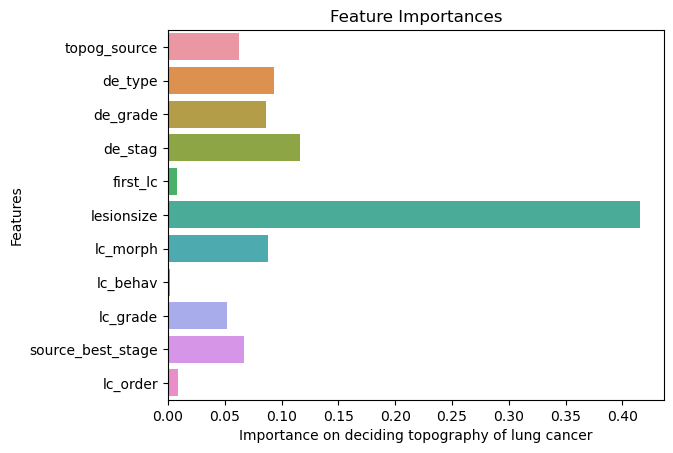

In [12]:
#Since we are only dealing with Lung Cancer here lc_topog states
"""C34.0: Main bronchus
   C34.1: Upper lobe, bronchus, or lung
   C34.2: Middle lobe, bronchus, or lung
   C34.3: Lower lobe, bronchus, or lung
   C34.8: Overlapping lesion of bronchus and lung
   C34.9: Bronchus or lung, unspecified
"""
#Classification of ICD-O-3 topography of lung cancer on the basis of other features
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

le=LabelEncoder()
x=df[["topog_source","de_type","de_grade","de_stag","first_lc","lesionsize","lc_morph","lc_behav","lc_grade","source_best_stage","lc_order"]]
y=le.fit_transform(df['lc_topog'])

rfc = RandomForestClassifier()
rfc.fit(x, y)

# Plot feature importances
importances = rfc.feature_importances_
feature_names = x.columns

sns.barplot(x=importances, y=feature_names)
plt.xlabel('Importance on deciding topography of lung cancer')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


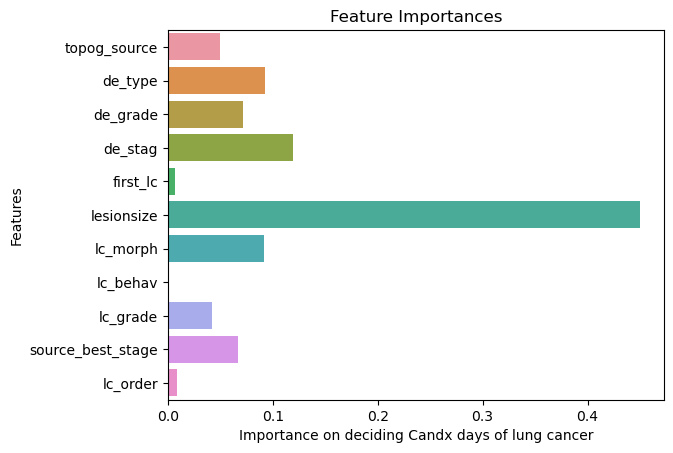

In [13]:
#Since we are only dealing with Lung Cancer here lc_topog states
"""C34.0: Main bronchus
   C34.1: Upper lobe, bronchus, or lung
   C34.2: Middle lobe, bronchus, or lung
   C34.3: Lower lobe, bronchus, or lung
   C34.8: Overlapping lesion of bronchus and lung
   C34.9: Bronchus or lung, unspecified
"""
#Classification of ICD-O-3 topography of lung cancer on the basis of other features
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

le=LabelEncoder()
x=df[["topog_source","de_type","de_grade","de_stag","first_lc","lesionsize","lc_morph","lc_behav","lc_grade","source_best_stage","lc_order"]]
y=df['candx_days']

rfc = RandomForestClassifier()
rfc.fit(x, y)

# Plot feature importances
importances = rfc.feature_importances_
feature_names = x.columns

sns.barplot(x=importances, y=feature_names)
plt.xlabel('Importance on deciding Candx days of lung cancer')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


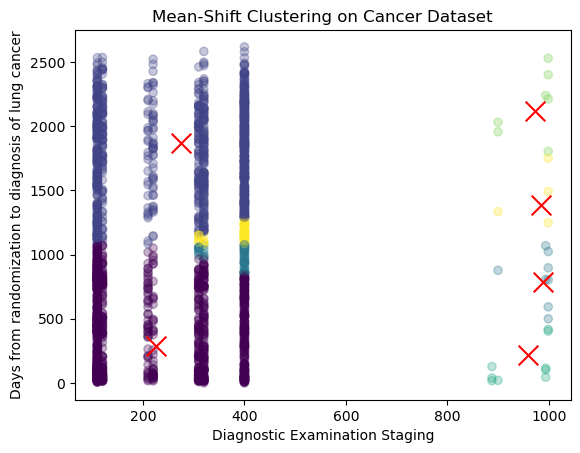

In [14]:
x=df[["de_stag","candx_days"]]

ms = MeanShift()
ms.fit(x)
labels = ms.labels_
centers = ms.cluster_centers_

plt.scatter(x["de_stag"], x["candx_days"], c=labels,alpha=0.3)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", color="red", s=200)
plt.xlabel('Diagnostic Examination Staging')
plt.ylabel('Days from randomization to diagnosis of lung cancer')
plt.title('Mean-Shift Clustering on Cancer Dataset')
plt.show()


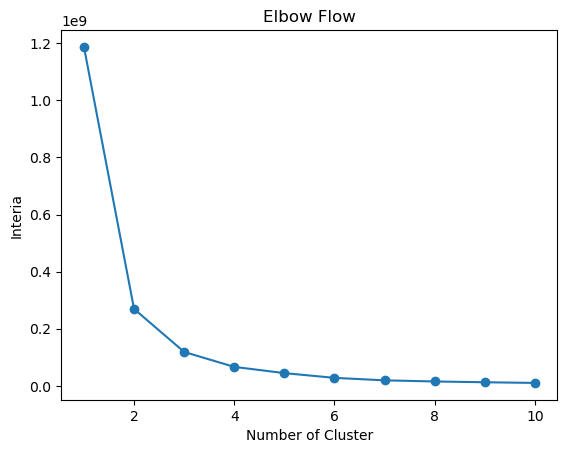

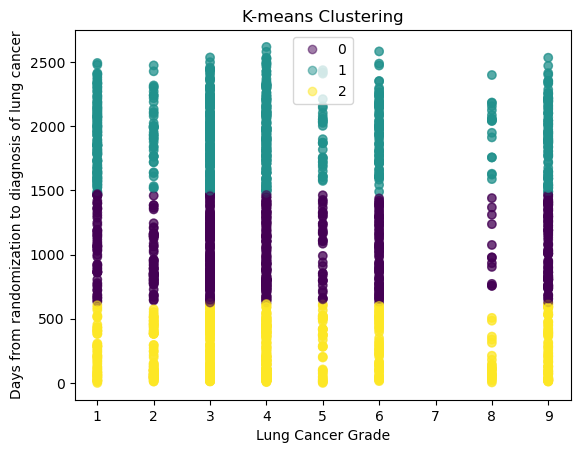

In [15]:
x=df[["de_grade","candx_days"]]
intr=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    intr.append(km.inertia_)
plt.plot(range(1, 11), intr, marker="o")
plt.xlabel("Number of Cluster")
plt.ylabel("Interia")
plt.title("Elbow Flow")
plt.show()

km=KMeans(n_clusters=3)
km.fit(x)
km.cluster_centers_
km.labels_

scatter = plt.scatter(x["de_grade"], x["candx_days"], c=km.labels_, alpha=0.5)

plt.scatter(x["de_grade"], x["candx_days"], c=km.labels_,alpha=0.5)
plt.xlabel("Lung Cancer Grade")
plt.ylabel("Days from randomization to diagnosis of lung cancer")
plt.title("K-means Clustering")
plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1])
plt.show()


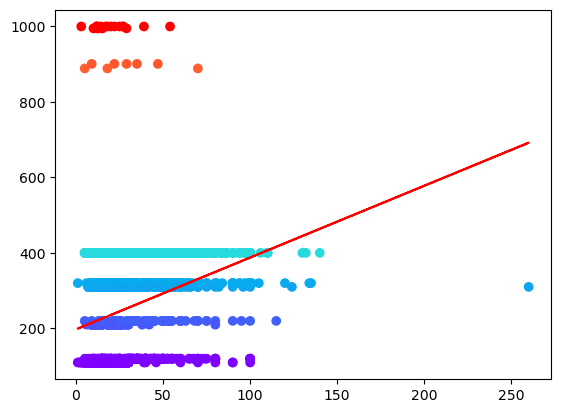

In [16]:
x = df["lesionsize"].values.reshape(-1, 1)
y = df["de_stag"].values.reshape(-1, 1)


poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)

lg1=LinearRegression()
lg1.fit(x,y)

lg=LinearRegression()
lg.fit(x_poly,y)

plt.scatter(x, y, c=df["de_stag"], cmap="rainbow",label=df["de_stag"].unique())
plt.plot(x,lg1.predict(x), c="red")

plt.show()

In [17]:
#Predicting Topography of cancer using Linear Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score


df=df.bfill()
x=df.drop(columns=["lc_topog","stage_only"])
y=df['stage_only']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 70.43490990572204
Mean Squared Error (MSE): 12625.030424144747
Root Mean Squared Error (RMSE): 112.36116065680679
R-squared (R2): 0.33519529263073855


In [18]:
from sklearn.ensemble import RandomForestClassifier

df=df.bfill()
x=df.drop(columns=["lc_topog","stage_only"])
y=df['stage_only']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=70)

model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=8, min_samples_leaf=7, max_features="auto", random_state=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

df=df.bfill()
x=df.drop(columns=["lc_topog","stage_only"])
y=df['stage_only']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=8, min_samples_leaf=7, max_features="auto", random_state=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

df=df.bfill()
x=df.drop(columns=["lc_topog","stage_only"])
y=df['stage_only']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

df=df.bfill()
x=df.drop(columns=["lc_topog","stage_only"])
y=df['stage_only']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


In [ ]:
#Plotting accuracy graph using loops

ij=[]
ac=[]
for i in range(1,100):
    df=df.bfill()
    x=df.drop(columns=["lc_topog","stage_only"])
    y=df['stage_only']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=i)

    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    ij.append(i)
    ac.append(accuracy)
    
plt.plot(ij,ac)
plt.show()

In [ ]:
#Plotting accuracy graph using loops

ij=[]
ac=[]
for i in range(1,100):
    df=df.bfill()
    x=df.drop(columns=["lc_topog","stage_only"])
    y=df['stage_only']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01*i, random_state=10)

    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    ij.append(i)
    ac.append(accuracy)
    
plt.plot(ij,ac)
plt.show()

In [ ]:
x=df.drop(columns=["lc_topog"])
x=x.bfill()
y=le.fit_transform(df['lc_topog'])


rfc = RandomForestClassifier()
rfc.fit(x, y)

# Plot feature importances
importances = rfc.feature_importances_
feature_names = x.columns

sns.barplot(x=importances, y=feature_names)
plt.xlabel('Importance on deciding topography of lung cancer')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [ ]:
#Plotting accuracy graph using loops

ij=[]
ac=[]
for i in range(1,100):
    df=df.bfill()
    x=df.drop(columns=["lc_topog","stage_only"])
    y=df['stage_only']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)

    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    ij.append(i)
    ac.append(accuracy)
    
plt.plot(ij,ac)
plt.show()

In [ ]:
x=df.drop(columns=["lc_topog","candx_days"])
x=x.bfill()
y=df['candx_days']

rfc = RandomForestClassifier()
rfc.fit(x, y)

# Plot feature importances
importances = rfc.feature_importances_
feature_names = x.columns

sns.barplot(x=importances, y=feature_names)
plt.xlabel('Importance on deciding candx_days of lung cancer')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

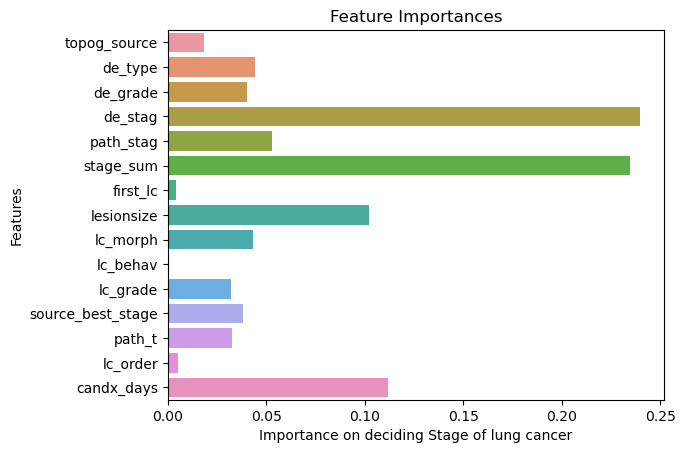

In [19]:
df=df.bfill()
x=df.drop(columns=["lc_topog","stage_only"])
y=df['stage_only']

rfc = RandomForestClassifier()
rfc.fit(x, y)

# Plot feature importances
importances = rfc.feature_importances_
feature_names = x.columns

sns.barplot(x=importances, y=feature_names)
plt.xlabel('Importance on deciding Stage of lung cancer')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [ ]:
#Plotting accuracy graph using loops

ij=[]
ac=[]
for i in range(1,100):
    df=df.bfill()
    x=df.drop(columns=["lc_topog","stage_only"])
    y=df['stage_only']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)

    model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=8, min_samples_leaf=7, max_features="auto", random_state=4)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    ij.append(i)
    ac.append(accuracy)
print("Maximum accuracy is : ",max(ac),"at random state",ij[ac.index(max(ac))])    
plt.plot(ij,ac)
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.title("LUNG CANCER Accuracy")
plt.show()

In [ ]:
#Plotting accuracy graph using loops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ij=[]
ac=[]
for i in range(1,100):
    df=df.bfill()
    x=df.drop(columns=["lc_topog","stage_only"])
    y=df['stage_only']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    sc=StandardScaler()
    x_train_s=sc.fit_transform(x_train)
    x_test_s=sc.transform(x_test)
    
    pca = PCA(n_components=1)
    x_train_pca = pca.fit_transform(x_train_s)
    x_test_pca = pca.transform(x_test_s)

    rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=8, min_samples_leaf=7, max_features="auto", random_state=4)
    rfc.fit(x_train_pca, y_train)
    y_pred = rfc.predict(x_test_pca)
    y_pred = y_pred.round().astype(int)

    acc=accuracy_score(y_test, y_pred)
    ij.append(i)
    ac.append(acc)
print("Maximum accuracy is : ",max(ac),"at random state",ij[ac.index(max(ac))])    
plt.plot(ij,ac)
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.title("LUNG CANCER STAGE Accuracy")
plt.show()